In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Load training data
train_data = pd.read_csv("DailyDelhiClimateTrain.csv")
train_data['date'] = pd.to_datetime(train_data['date'], format='mixed')
train_data.set_index('date', inplace=True)

# Load testing data
test_data = pd.read_csv("DailyDelhiClimateTest.csv")
test_data['date'] = pd.to_datetime(test_data['date'], format='mixed')
test_data.set_index('date', inplace=True)

train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14556\2128369769.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14556\2128369769.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


In [6]:

# Split training data into features (X_train) and target (y_train)
X_train = train_data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
y_train = train_data[['meantemp']]

# Prepare testing data
X_test = test_data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
y_test = test_data[['meantemp']]

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)

# Reshape the data for LSTM input
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

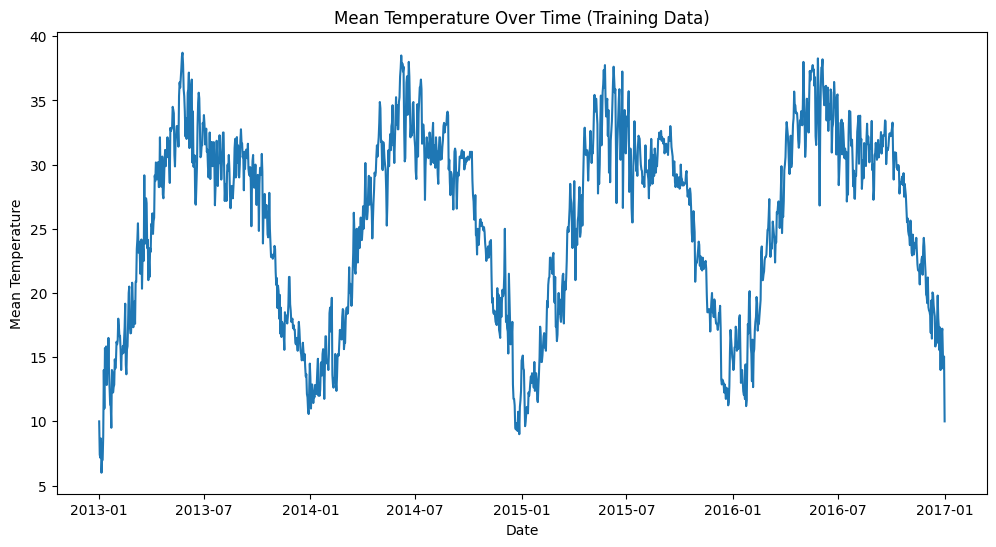

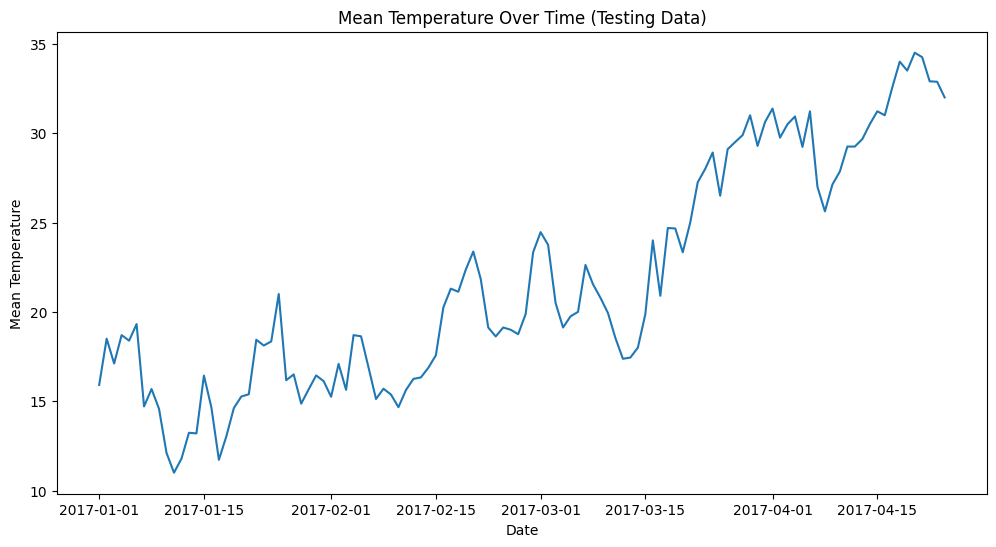

In [11]:
import matplotlib.pyplot as plt
# Plot mean temperature over time for training data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['meantemp'])
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Over Time (Training Data)')
plt.show()

# Plot mean temperature over time for testing data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['meantemp'])
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Over Time (Testing Data)')
plt.show()

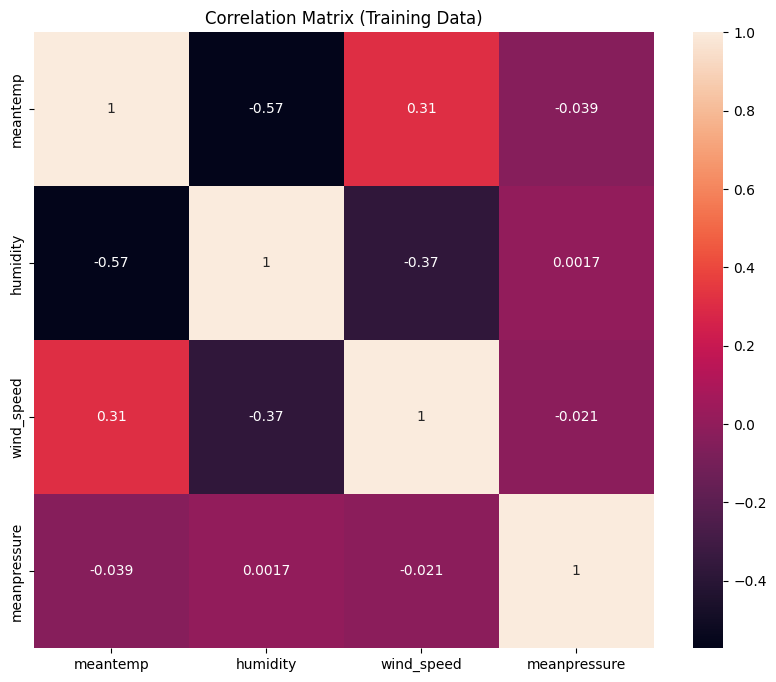

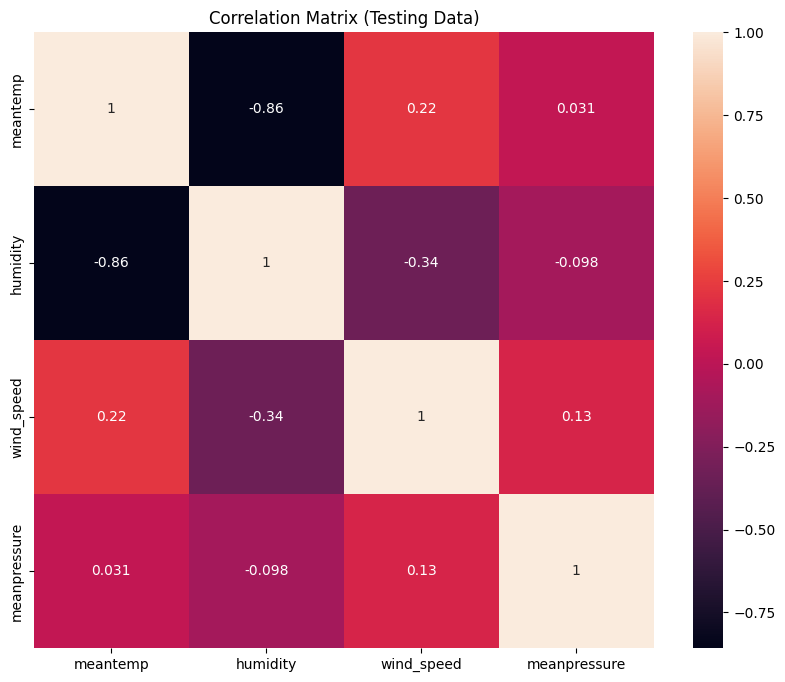

In [14]:
import seaborn as sns
# Calculate correlation matrix for training data
corr_matrix_train = train_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True)
plt.title('Correlation Matrix (Training Data)')
plt.show()

# Calculate correlation matrix for testing data (optional, if you want to compare)
corr_matrix_test = test_data.corr()

# Visualize correlation matrix (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_test, annot=True)
plt.title('Correlation Matrix (Testing Data)')
plt.show()

Epoch 1/100


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 637.4039 - val_loss: 212.2166
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 287.3471 - val_loss: 114.6762
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 189.3654 - val_loss: 78.9600
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 144.2995 - val_loss: 57.3334
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 109.0927 - val_loss: 46.1448
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.8461 - val_loss: 41.1996
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.9313 - val_loss: 40.0697
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.1858 - val_loss: 41.1614
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.3948 - val_loss: 43.1513
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.3873 - val_loss: 45.5510
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.3598 - val_loss: 47.8119
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

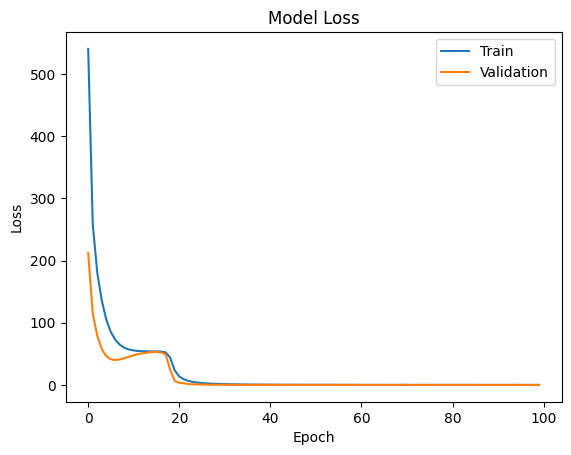

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
Mean Squared Error: 4.740036776589005


In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)